In [2]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow as tf

In [16]:
observaciones = 1000

x1 = np.random.uniform(low = -10, high = 10, size = (observaciones,1))
x2 = np.random.uniform(-10, 10, (observaciones,1))

X = np.column_stack((x1,x2))

ruido = np.random.uniform(-1, 1, (observaciones,1))

y = 2 * x1 - 3 * x2 + 5 + ruido

np.savez('Datos_TF', entradas = X, targets = y)  
datos = np.load('Datos_TF.npz')
tamanio_entrada = 2

tamanio_salida = 1

In [32]:
modelo = tf.keras.Sequential([
                           
    tf.keras.layers.Dense(tamanio_salida,
                            kernel_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1),
                            bias_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1)
                            )
    ])
optimizador_adhoc = tf.keras.optimizers.SGD(learning_rate = 0.001)
modelo.compile(optimizer = optimizador_adhoc, loss='mean_squared_error')
modelo.fit(datos['entradas'], datos['targets'], epochs = 200, verbose = 0)
modelo.layers[0].get_weights()
pesos = modelo.layers[0].get_weights()[0]
print("pesos") 
print(pesos)
sesgos = modelo.layers[0].get_weights()[1]
print("sesgos")
print(sesgos)
modelo.predict_on_batch(datos['entradas']).round(1)[:5, :]
datos['targets'].round(1)[:5, :]

pesos
[[ 1.9989704]
 [-3.0069976]]
sesgos
[4.9888067]


array([[-30.1],
       [ 28.1],
       [ 34. ],
       [  7.8],
       [-21.1]])

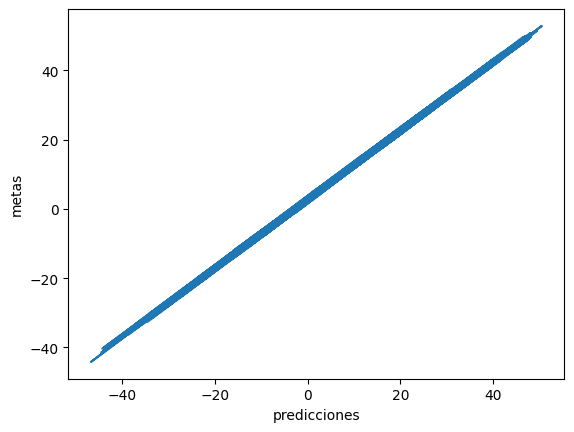

In [18]:
plt.plot(np.squeeze(modelo.predict_on_batch(datos['entradas'])), 
         np.squeeze(datos['targets']))
plt.xlabel('predicciones')
plt.ylabel('metas')
plt.show()

# Optimización de Hiperparámetros
- Cambie el número de observaciones a 100,000. Este no es un hiperparámetro pero puede afectar el rendimiento del modelo. ¿Qué ocurre?
  - La forma general de la gráfica parece no haber cambiado significativamente entre las dos pruebas (lo cual indica que el modelo está realizando una predicción lineal consistente en ambos casos)
  -  Con 100,000 observaciones, las predicciones varían en un rango mucho más amplio. Esto podría deberse a que con más datos, el modelo ha sido expuesto a una variedad mayor de combinaciones de x1 y x2, lo que potencialmente captura mejor las complejidades y variabilidades subyacentes en los datos.
  - El tiempo de ejecución aumentó significativamente de menos de 10 segundos a más de 3 minutos.


- Experimente con diferentes valores para la tasa de aprendizaje. Los valores como 0.0001, 0.001, 0.1, 1 son interesantes para observar. Prueba también cambiando el número de épocas (50, 100, 200). ¿Qué diferencias se observan? ¿Se comporta bien el algoritmo?

    - Tasas de Aprendizaje Bajas (0.0001, 0.001, 0.01)
        - Convergencia: A estas tasas, los pesos y sesgos están convergiendo hacia valores que parecen razonables para el modelo, dada la función objetivo (y = 2 * x1 - 3 * x2 + 5 + ruido). Los valores de los pesos se acercan a los coeficientes reales, y los sesgos también se están ajustando adecuadamente, especialmente en tasas de 0.001 y 0.01.
        - Estabilidad: A estas tasas, el modelo es capaz de ajustarse sin diverger, lo que se refleja en la ausencia de valores NaN en los pesos y sesgos.
    - Tasas de Aprendizaje Altas (0.1, 1.0)
        - Divergencia: Los valores NaN en los pesos y sesgos indican que el modelo está divergiendo a estas tasas de aprendizaje. Esto es un signo clásico de que la tasa de aprendizaje es demasiado alta para que el algoritmo de optimización maneje los ajustes en los pesos de manera efectiva sin causar inestabilidades numéricas.
    - 50 Épocas
        - Pesos y Sesgos: Los valores están cerca de los valores teóricos esperados de 2 y -3 para los pesos, y el sesgo se acerca a 5. La convergencia es buena, pero el sesgo aún está un poco alejado del valor objetivo, lo que sugiere que podría beneficiarse de más épocas de entrenamiento.
    - 100 Épocas
        - Convergencia Mejorada: Los pesos están muy cerca de converger perfectamente a los valores teóricos, y el sesgo también está muy cerca del valor objetivo. Este es un buen signo de que el modelo ha tenido suficiente tiempo para ajustarse adecuadamente a los datos.
    - 200 Épocas
        - Estabilidad en la Convergencia: Los pesos y el sesgo no muestran una mejora significativa respecto a las 100 épocas. Esto podría indicar que el modelo ha alcanzado una estabilidad en términos de aprendizaje y que épocas adicionales no están aportando mejoras significativas en la precisión.
    - Resultados
        
        - Variación de Tasa de Aprendizaje

            | Tasa de Aprendizaje | Pesos              | Sesgos    |
            |---------------------|--------------------|-----------|
            | 0.0001              | [[2.032564], [-3.0082636]] | [2.3548524] |
            | 0.001               | [[2.000893], [-3.000168]]  | [4.981708]  |
            | 0.01                | [[1.9770337], [-2.9914713]]| [4.9942794] |
            | 0.1                 | [[nan], [nan]]     | [nan]     |
            | 1.0                 | [[nan], [nan]]     | [nan]     |

        - Variación de épocas

            | Épocas | Pesos            | Sesgos    |
            |--------|------------------|-----------|
            | 50     | [[2.0040655], [-3.0038073]] | [4.782852]  |
            | 100    | [[1.9998173], [-3.0013437]] | [4.9809766] |
            | 200    | [[1.9989704], [-3.0069976]] | [4.9888067] |


- Cambie la función de pérdida. ¿Cómo se comparan los resultados al cambiar la función de pérdida? Una función alternativa es la “Huber Loss”.

In [37]:
modelo = tf.keras.Sequential([
                           
    tf.keras.layers.Dense(tamanio_salida,
                            kernel_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1),
                            bias_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1)
                            )
    ])
optimizador_adhoc = tf.keras.optimizers.SGD(learning_rate = 1.0)
modelo.compile(optimizer=optimizador_adhoc, loss=tf.keras.losses.Huber())
modelo.fit(datos['entradas'], datos['targets'], epochs = 100, verbose = 0)
modelo.layers[0].get_weights()
pesos = modelo.layers[0].get_weights()[0]
print("pesos") 
print(pesos)
sesgos = modelo.layers[0].get_weights()[1]
print("sesgos")
print(sesgos)
modelo.predict_on_batch(datos['entradas']).round(1)[:5, :]
datos['targets'].round(1)[:5, :]

pesos
[[ 4.7328024]
 [-4.395986 ]]
sesgos
[5.1507034]


array([[-30.1],
       [ 28.1],
       [ 34. ],
       [  7.8],
       [-21.1]])

| Tasa de Aprendizaje | Función de Pérdida | Pesos             | Sesgos     |
|---------------------|--------------------|-------------------|------------|
| 0.0001              | MSE                | [[2.032564], [-3.0082636]] | [2.3548524] |
| 0.001               | MSE                | [[2.000893], [-3.000168]]  | [4.981708]  |
| 0.01                | MSE                | [[1.9770337], [-2.9914713]]| [4.9942794] |
| 0.1                 | MSE                | [[nan], [nan]]     | [nan]     |
| 1.0                 | MSE                | [[nan], [nan]]     | [nan]     |
| 0.0001              | Huber              | [[0.7455253], [-1.2695354]]| [0.0995327]|
| 0.001               | Huber              | [[2.1790764], [-3.0191176]]| [2.5957723]|
| 0.01                | Huber              | [[1.9974045], [-3.0010726]]| [4.9889784]|
| 0.1                 | Huber              | [[2.1245768], [-2.9450212]]| [5.0553155]|
| 1.0                 | Huber              | [[4.7328024], [-4.395986]] | [5.1507034]|


- Análisis de los Resultados con Huber Loss
    - Tasa de Aprendizaje 0.0001:
        - Pesos y Sesgos: Hay una convergencia mucho menos efectiva en comparación con MSE, mostrando valores significativamente alejados de los ideales (2 y -3 para los pesos, aproximadamente 5 para el sesgo)
    - Tasa de Aprendizaje 0.001:
        - Pesos y Sesgos: Convergen más cerca de los valores ideales que con MSE, indicando una buena adaptación del modelo a los datos.
    - Tasa de Aprendizaje 0.01:
        - Pesos y Sesgos: Los valores están muy cercanos a los ideales y son comparables a los obtenidos con MSE, indicando que Huber Loss funciona bien con tasas de aprendizaje moderadas.
    - Tasa de Aprendizaje 0.1:
        - Pesos y Sesgos: A diferencia de MSE, que divergía, Huber Loss permite una convergencia estable a esta tasa, lo que muestra su efectividad para manejar tasas de aprendizaje más altas sin divergencia.
    - Tasa de Aprendizaje 1.0:
        - Pesos y Sesgos: Aunque los valores se desvían más de los ideales en comparación con tasas más bajas, no resultan en divergencia como lo hicieron con MSE. Esto refuerza la robustez de Huber Loss frente a altas tasas de aprendizaje.

- Evaluación de la Precisión y la Pérdida del Modelo
    - Precisión: En general, parece que Huber Loss mejora la estabilidad del modelo a tasas de aprendizaje más altas y proporciona una convergencia más consistente a tasas bajas y moderadas.
    - Pérdida del Modelo: La pérdida con Huber Loss debería ser menos susceptible a outliers, lo que podría resultar en una pérdida más baja en escenarios con datos ruidosos o con outliers.

## Implementación de validación cruzada

Fold 1, Loss: 14.554980278015137
Fold 2, Loss: 15.119572639465332
Fold 3, Loss: 6.586780548095703
Fold 4, Loss: 17.23741912841797
Fold 5, Loss: 7.997908115386963
Pérdidas por fold: [14.554980278015137, 15.119572639465332, 6.586780548095703, 17.23741912841797, 7.997908115386963]
Promedio de pérdida: 12.29933214187622
Desviación estándar de la pérdida: 4.208607903623833


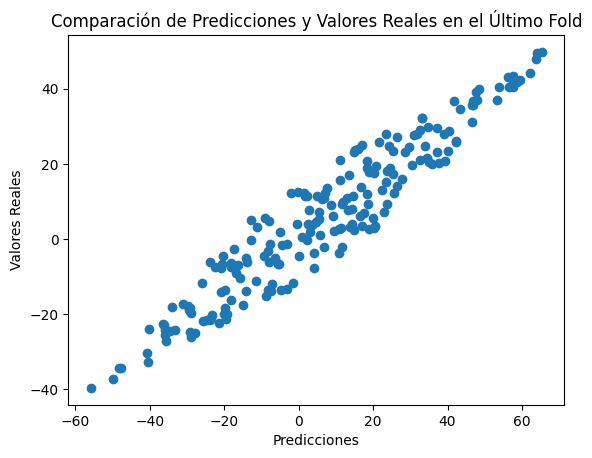

In [38]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Cargar datos
datos = np.load('Datos_TF.npz')
X = datos['entradas']
y = datos['targets']

# Parámetros del modelo
tamanio_salida = 1
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Resultados de validación cruzada
resultados_loss = []
fold_var = 1

# Función para construir el modelo
def build_model():
    modelo = tf.keras.Sequential([
        tf.keras.layers.Dense(tamanio_salida,
                              kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                              bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                             )
    ])
    optimizador_adhoc = tf.keras.optimizers.SGD(learning_rate=1.0)
    modelo.compile(optimizer=optimizador_adhoc, loss=tf.keras.losses.Huber())
    return modelo

# Ejecutar validación cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = build_model()
    model.fit(X_train, y_train, epochs=100, verbose=0)
    
    loss = model.evaluate(X_test, y_test, verbose=0)
    resultados_loss.append(loss)
    
    print(f'Fold {fold_var}, Loss: {loss}')
    fold_var += 1

# Promedio y desviación estándar de la pérdida
print("Pérdidas por fold:", resultados_loss)
print("Promedio de pérdida:", np.mean(resultados_loss))
print("Desviación estándar de la pérdida:", np.std(resultados_loss))

# Opcional: Graficar el resultado de una iteración para visualizar ajuste
plt.plot(np.squeeze(model.predict_on_batch(X_test)), np.squeeze(y_test), 'o')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Comparación de Predicciones y Valores Reales en el Último Fold')
plt.show()


### Interpretación de Resultados
- La interpretación de los resultados obtenidos a través de la variación de hiperparámetros y la implementación de la validación cruzada nos 
permite comprender en profundidad cómo estas modificaciones influyen en el rendimiento del modelo.

- Impacto de los Hiperparámetros
    - Tasa de Aprendizaje: Observamos que las tasas de aprendizaje más bajas tienden a ofrecer una convergencia más estable, pero potencialmente más lenta, como se evidencia en los primeros experimentos con MSE y Huber loss. Tasas de aprendizaje muy altas, por otro lado, causaron divergencia (resultados NaN), especialmente con MSE. Con Huber loss, que es menos sensible a outliers, las tasas de aprendizaje más altas se manejaron mejor, aunque los valores de los pesos y sesgos no siempre se alinearon exactamente con los valores teóricos esperados.
    - Función de Pérdida: Cambiar a Huber loss mostró una mejora significativa en la estabilidad del modelo a tasas de aprendizaje altas, destacando su utilidad en manejar outliers o distribuciones de datos con variaciones grandes. También proporcionó resultados más consistentes en la validación cruzada, evidenciando su capacidad para generalizar mejor en comparación con MSE.
    - Número de Épocas: Aumentar el número de épocas generalmente mejora la precisión del modelo hasta cierto punto, como se observó con 100 épocas proporcionando una buena convergencia. Sin embargo, más allá de cierto punto (200 épocas), los beneficios parecen estancarse, lo que sugiere la posibilidad de sobreajuste o simplemente de alcanzar los límites de aprendizaje dado el diseño actual del modelo.
- Validación Cruzada
    - Estabilidad y Generalización: La validación cruzada mostró variabilidad en la pérdida entre diferentes folds, indicando que el modelo puede estar sobreajustándose a ciertas características de los subconjuntos de entrenamiento. La desviación estándar alta en las pérdidas sugiere que el modelo podría beneficiarse de ajustes adicionales en su capacidad para manejar diferentes distribuciones de datos.
    - Evaluación Integral: Al evaluar el modelo en múltiples subconjuntos de datos, la validación cruzada proporciona una visión más completa y confiable de la capacidad del modelo para generalizar a nuevos datos, en comparación con una división simple de entrenamiento/prueba.

### Sugerencias para Mejoras
- Optimización de la Tasa de Aprendizaje: Considerar la implementación de técnicas de ajuste de tasa de aprendizaje adaptativo, como el uso de optimizadores como Adam o RMSprop, que ajustan la tasa de aprendizaje durante el entrenamiento basándose en los resultados obtenidos.
- Aumento de la Regularización: Integrar métodos de regularización como L1, L2, o Dropout para reducir el riesgo de sobreajuste, especialmente útil si se incrementa el número de épocas o la complejidad del modelo.
- Análisis Profundo de Datos: Realizar un análisis exploratorio de datos para identificar y tratar outliers, y entender mejor la distribución de los datos, lo que podría informar mejor la preparación de datos y la ingeniería de características.